## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('german.csv', sep=';')


In [3]:

#X = data.iloc[:, 1:]
#y = data.iloc[:, 0]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
random.seed(170)
random_100_y = data.query("Creditability==0").iloc[random.choices(range(300), k=100)]
new_data = pd.concat([data.query("Creditability==0"), random_100_y, data])
X = new_data.iloc[:, 1:]
y = new_data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

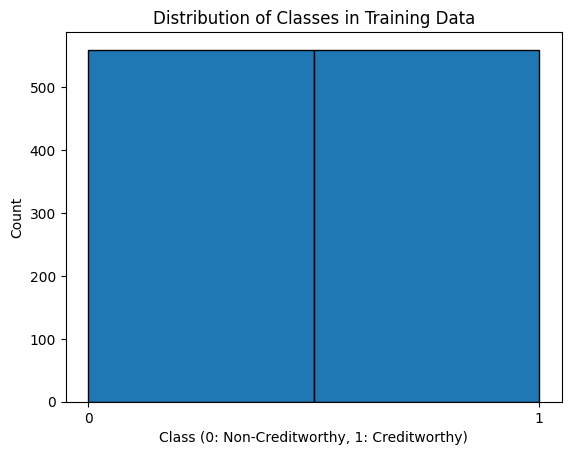

In [5]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [6]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc}")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc}")
print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")

Random Forest метрики:
ROC AUC: 0.9107142857142858
Accuracy: 0.9107142857142857
Precision: 0.9831932773109243
Recall: 0.8357142857142857

Gradient Boosting метрики:
ROC AUC: 0.6714285714285714
Accuracy: 0.6714285714285714
Precision: 0.6875
Recall: 0.6285714285714286


In [7]:
deapths = []
for i in range(1, 100):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=i, min_samples_split=2)
    score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="roc_auc")
    deapths.append(score.mean())


In [8]:
graph_df = pd.DataFrame(columns=["deapth", "mean_roc"])
graph_df["deapth"] = pd.Series(list(range(1, 100)))
graph_df["mean_roc"] = pd.Series(deapths)

In [9]:
graph_df.head(20)

,deapth,mean_roc
0,1,0.773438
1,2,0.784487
2,3,0.796078
3,4,0.809566
4,5,0.829385
5,6,0.859455
6,7,0.879273
7,8,0.898964
8,9,0.911272
9,10,0.923852


<Axes: xlabel='deapth'>

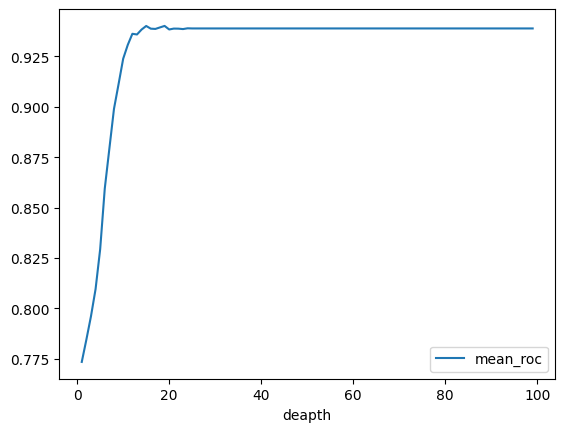

In [10]:
graph_df.plot(x="deapth", y="mean_roc")

In [11]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30, ), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.69
Accuracy: 0.69
Precision: 0.65
Recall: 0.80


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели